In [58]:
# ============ init ==============
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
pd.set_option('display.width', 1000)
import numpy as np

In [59]:
# ============ data ==============
# format: <card name>-<driver version>
card_names = ['2080Ti FE-460.89', '3090 FE-460.89', '3080 FE-460.89', '2080Ti FE-436.48', '2070-436.48', '1080Ti FE-436.48']
cuda_cores = [4352, 10496, 8704, 4352, 2304, 3584]
texture_mapping_units = [272, 328, 272, 272, 144, 224]
render_output_units = [88, 112, 96, 88, 64, 88]
ray_tracing_cores = [68, 82, 68, 68, 36, 0]
tensor_cores = [544, 328, 272, 544, 288, 0]
rrp_dollars = [1200, 1500, 700, 1200, 600, 700]
predictors = [
    ('CUDA cores', cuda_cores),
    ('Texture mapping units', texture_mapping_units),
    ('Render output units', render_output_units),
    ('Ray tracing cores', ray_tracing_cores),
    ('Tensor cores', tensor_cores),
    ('RRP $', rrp_dollars)]
# ys[i][j] <=> fps for scene i with card j
ys = [[] for _ in range(0, 5)]
ys[0] = np.array([37.7, 42.7, 34.3, 36.1, 19.9, 3.4])
ys[1] = np.array([38.2, 43.6, 34.9, 35.7, 19.9, 3.4])
ys[2] = np.array([24.2, 39.1, 30.2, 19.9, 11.7, 1.9])
ys[3] = np.array([58.7, 78.5, 64.1, 54.9, 30.4, 3.8])
ys[4] = np.array([21.4, 40.0, 32.6, 15.1, 9.5, 1.3])

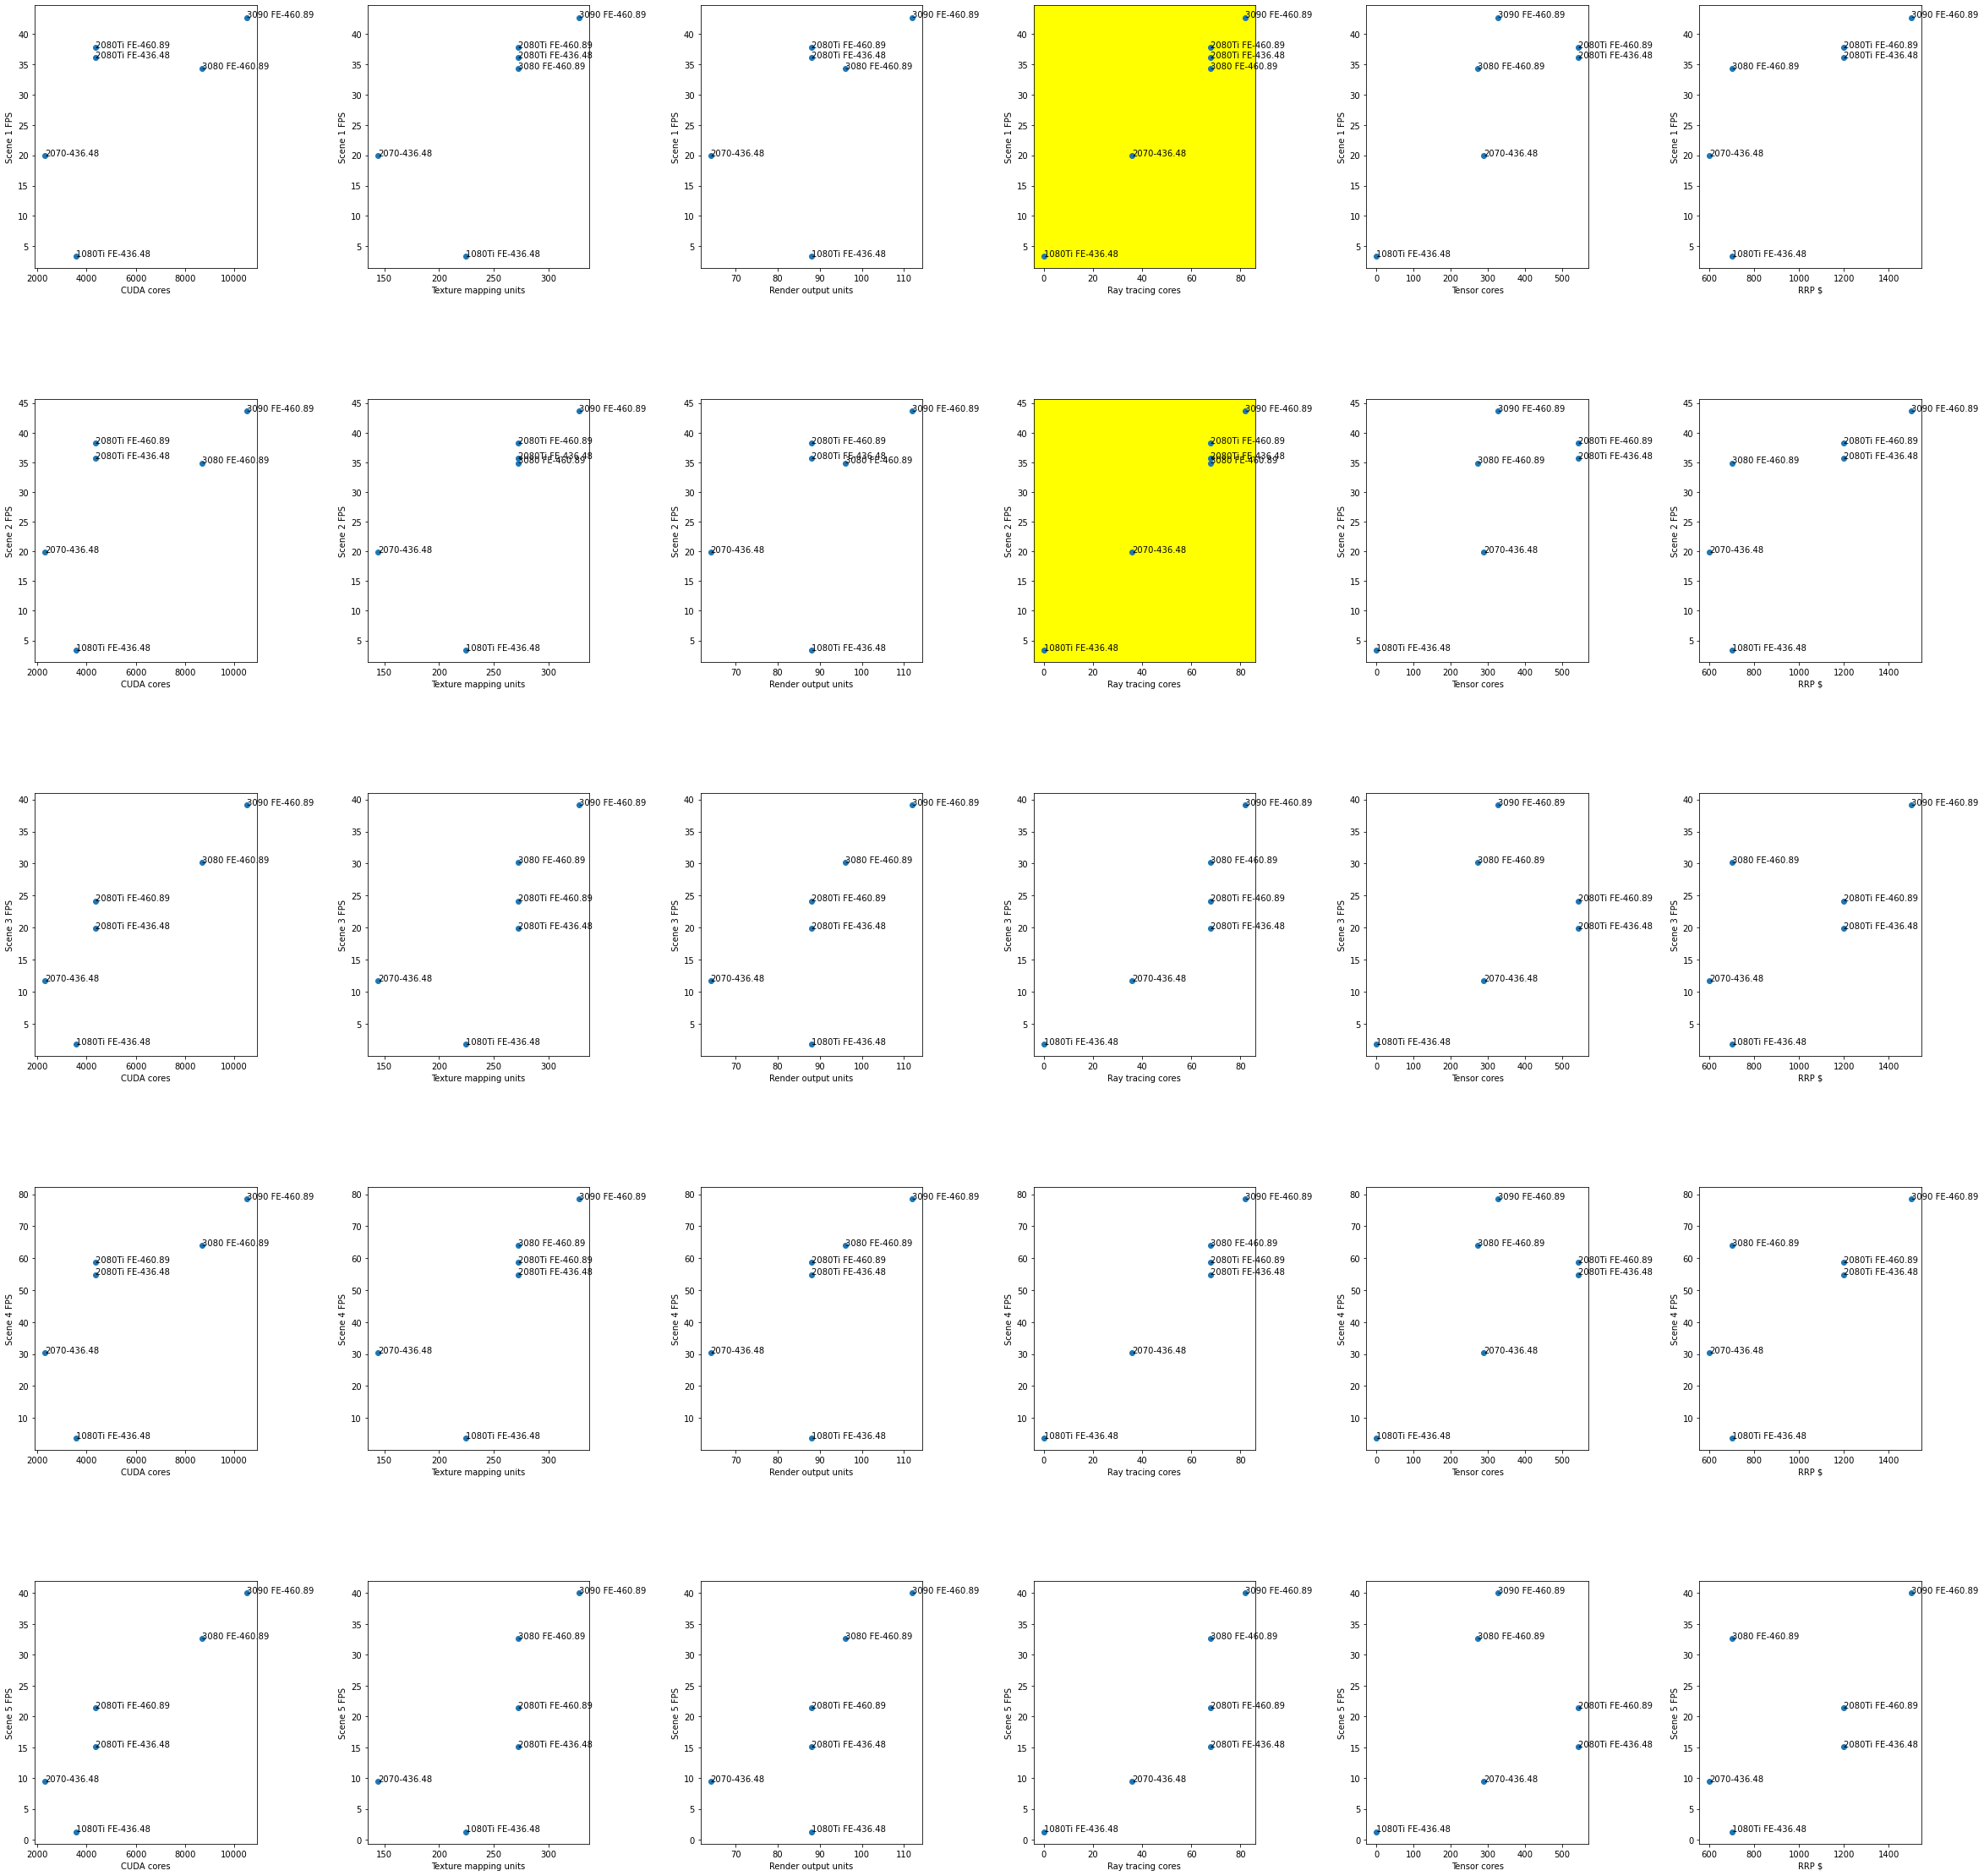

In [71]:
# ============ plot ==============
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(40, 40), facecolor='white')
rows = len(ys)
cols = len(predictors)
gs = gridspec.GridSpec(rows,cols,wspace=0.5, hspace=0.5)
axs = [plt.subplot(gs[i]) for i in range(rows*cols)]
for yidx in range(0, len(ys)):
    y = ys[yidx]
    scene_number = yidx + 1
    y_name = 'Scene ' + str(scene_number) + ' FPS'
    for xidx in range(0, len(predictors)):
        (x_name, x) = predictors[xidx]
        ax = axs[yidx*cols+xidx]
        ax.scatter(x, y)
        for i in range(0, len(card_names)):
            ax.annotate(card_names[i], (x[i], y[i]))
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        if x_name == 'Ray tracing cores' and scene_number in [1, 2]:
            ax.set_facecolor((1, 1, 0))
plt.show()